In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("tournaments_1877-2017_unindexed.csv")
df.columns.str.startswith('doubles')
df = df.loc[:,~df.columns.str.startswith('doubles')]

In [49]:
df.head()

,tourney_year,tourney_order,tourney_name,tourney_id,tourney_slug,tourney_location,tourney_dates,tourney_month,tourney_day,tourney_singles_draw,tourney_doubles_draw,tourney_conditions,tourney_surface,tourney_fin_commit,tourney_url_suffix,singles_winner_name,singles_winner_url,singles_winner_player_slug,singles_winner_player_id,tourney_year_id
0,1877,1,Wimbledon,540.0,wimbledon,"London, Great Britain",1877.07.09,7.0,9.0,32,32,Outdoor,Grass,NaN,/en/scores/archive/wimbledon/540/1877/results,Spencer Gore,/en/players/spencer-gore/gi91/overview,spencer-gore,gi91,1877-540
1,1878,1,Wimbledon,540.0,wimbledon,"London, Great Britain",1878.07.08,7.0,8.0,64,64,Outdoor,Grass,NaN,/en/scores/archive/wimbledon/540/1878/results,Frank Hadow,/en/players/frank-hadow/hg50/overview,frank-hadow,hg50,1878-540
2,1879,1,Wimbledon,540.0,wimbledon,"London, Great Britain",1879.07.07,7.0,7.0,64,64,Outdoor,Grass,NaN,/en/scores/archive/wimbledon/540/1879/results,John Hartley,/en/players/john-hartley/hg35/overview,john-hartley,hg35,1879-540
3,1880,1,Wimbledon,540.0,wimbledon,"London, Great Britain",1880.07.05,7.0,5.0,64,64,Outdoor,Grass,NaN,/en/scores/archive/wimbledon/540/1880/results,John Hartley,/en/players/john-hartley/hg35/overview,john-hartley,hg35,1880-540
4,1881,1,Wimbledon,540.0,wimbledon,"London, Great Britain",1881.07.02,7.0,2.0,64,64,Outdoor,Grass,NaN,/en/scores/archive/wimbledon/540/1881/results,William Renshaw,/en/players/william-renshaw/rg71/overview,william-renshaw,rg71,1881-540


In [50]:
#Best player of each year
for year in range(1877, 2018):
    df_y = df[df.tourney_year == year]
    a = df_y['singles_winner_name'].value_counts().idxmax()
    print(year, ":", a)

1877 : Spencer Gore
1878 : Frank Hadow
1879 : John Hartley
1880 : John Hartley
1881 : William Renshaw
1882 : William Renshaw
1883 : William Renshaw
1884 : William Renshaw
1885 : William Renshaw
1886 : William Renshaw
1887 : Herbert Lawford
1888 : Ernest Renshaw
1889 : William Renshaw
1890 : Willoughby Hamilton
1891 : Wilfred Baddeley
1892 : Wilfred Baddeley
1893 : Joshua Pim
1894 : Joshua Pim
1895 : Wilfred Baddeley
1896 : Harold Mahony
1897 : Reggie Doherty
1898 : Reggie Doherty
1899 : Reggie Doherty
1900 : Reggie Doherty
1901 : Arthur Gore
1902 : Laurence Doherty
1903 : Laurence Doherty
1904 : Laurence Doherty
1905 : Laurence Doherty
1906 : Laurence Doherty
1907 : Norman Brookes
1908 : Arthur Gore
1909 : Arthur Gore
1910 : Rodney Heath
1911 : Tony Wilding
1912 : Tony Wilding
1913 : Tony Wilding
1914 : Norman Brookes
1915 : Gordon Lowe
1916 : Richard Norris Williams
1917 : Lindley Murray
1918 : Lindley Murray
1919 : Gerald Patterson
1920 : Bill Tilden
1921 : Brian Norton
1922 : Gerald

In [51]:
#The tournaments
counts = df.tourney_name.value_counts()
print(counts)

Wimbledon           131
US Championships     87
US Open              50
Roland Garros        50
Barcelona            49
                   ... 
Fort Worth            1
Quebec                1
Aptos                 1
Brussels WCT          1
Nitto ATP Finals      1
Name: tourney_name, Length: 516, dtype: int64


In [52]:
#Grand slam champions
df_gs = df.loc[df['tourney_name'].isin(['Wimbledon', 'Roland Garros', 'US Open', 'Australian Open'])]
counts = df_gs.singles_winner_name.value_counts()
print(counts)

Roger Federer      19
Rafael Nadal       16
Pete Sampras       14
Novak Djokovic     12
Bjorn Borg         11
                   ..
Andres Gimeno       1
Manuel Orantes      1
Mark Edmondson      1
Adriano Panatta     1
Marin Cilic         1
Name: singles_winner_name, Length: 98, dtype: int64


In [58]:
column_names = ['name', 'hard', 'clay', 'grass']
df_bar = pd.DataFrame(columns = column_names)

for name in ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic']:
    df_temp = df.loc[df['singles_winner_name']==name]
    
    clay = (df_temp['tourney_surface']=='Hard').sum()
    grass = (df_temp['tourney_surface']=='Clay').sum()
    hard = (df_temp['tourney_surface']=='Grass').sum()
    
    df_bar.loc[len(df_bar.index)] = [name, clay, grass, hard]

df_bar.head()

,name,hard,clay,grass
0,Roger Federer,65,11,17
1,Rafael Nadal,18,53,4
2,Novak Djokovic,51,13,4


<AxesSubplot:title={'center':'Winners by surface'}, xlabel='name'>

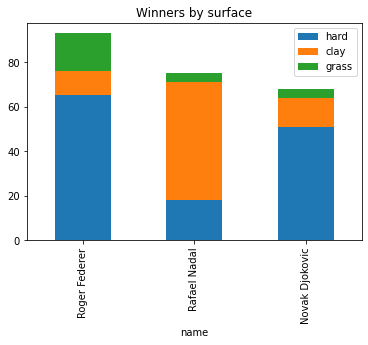

In [59]:
df_bar.plot.bar(x='name', stacked=True, title='Winners by surface')

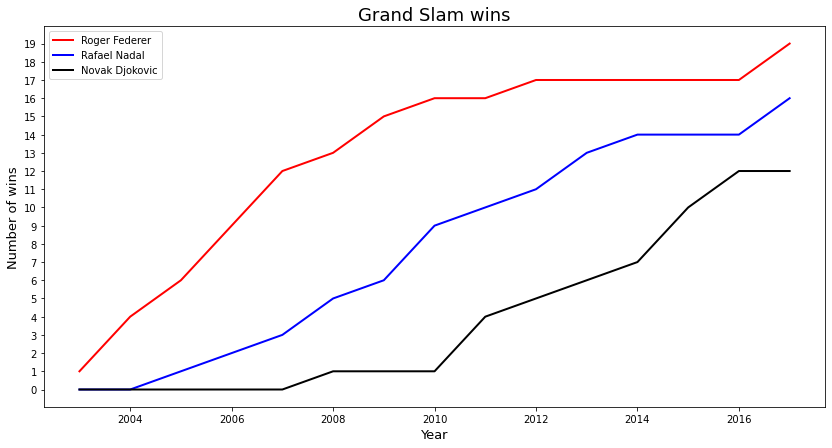

In [41]:
df_b3 = df_gs.loc[df_gs['singles_winner_name'].isin(['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'])]

column_names = ['year', 'Roger Federer', 'Rafael Nadal', 'Novak Djokovic']
df_f = pd.DataFrame(columns = column_names)

win_f = 0
win_n = 0
win_d = 0

for year in range(2003, 2018):
    df_y = df_b3.loc[df_b3['tourney_year'] == year]
    
    win_f += (df_y['singles_winner_name']=='Roger Federer').sum()
    win_n += (df_y['singles_winner_name']=='Rafael Nadal').sum()
    win_d += (df_y['singles_winner_name']=='Novak Djokovic').sum()

    df_f.loc[len(df_f.index)] = [year, win_f, win_n, win_d]

plt.figure(figsize=(14,7))
plt.yticks(range(0, 20))

sns.lineplot(x = df_f.year, y = df_f['Roger Federer'], ci = None, color='red', linewidth=2)
sns.lineplot(x = df_f.year, y = df_f['Rafael Nadal'], ci = None, color='blue', linewidth=2)
sns.lineplot(x = df_f.year, y = df_f['Novak Djokovic'], ci = None, color='black', linewidth=2)

plt.xlabel('Year', fontsize=13)
plt.ylabel('Number of wins', fontsize=13)
plt.legend(['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'])
plt.title('Grand Slam wins',fontsize=18);
plt.show()

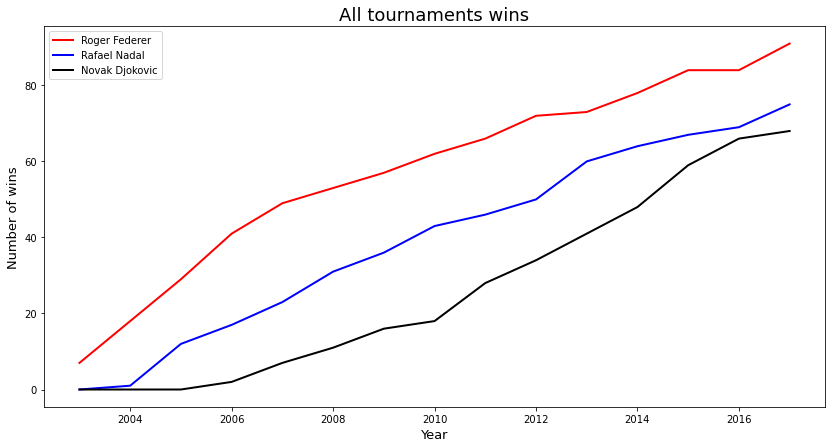

In [42]:
df_b3 = df.loc[df['singles_winner_name'].isin(['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'])]

column_names = ['year', 'Roger Federer', 'Rafael Nadal', 'Novak Djokovic']
df_f = pd.DataFrame(columns = column_names)

win_f = 0
win_n = 0
win_d = 0

for year in range(2003, 2018):
    df_y = df_b3.loc[df_b3['tourney_year'] == year]
    
    win_f += (df_y['singles_winner_name']=='Roger Federer').sum()
    win_n += (df_y['singles_winner_name']=='Rafael Nadal').sum()
    win_d += (df_y['singles_winner_name']=='Novak Djokovic').sum()

    df_f.loc[len(df_f.index)] = [year, win_f, win_n, win_d]

plt.figure(figsize=(14,7))

sns.lineplot(x = df_f.year, y = df_f['Roger Federer'], ci = None, color='red', linewidth=2)
sns.lineplot(x = df_f.year, y = df_f['Rafael Nadal'], ci = None, color='blue', linewidth=2)
sns.lineplot(x = df_f.year, y = df_f['Novak Djokovic'], ci = None, color='black', linewidth=2)

plt.xlabel('Year', fontsize=13)
plt.ylabel('Number of wins', fontsize=13)
plt.legend(['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'])
plt.title('All tournaments wins',fontsize=18);
plt.show()

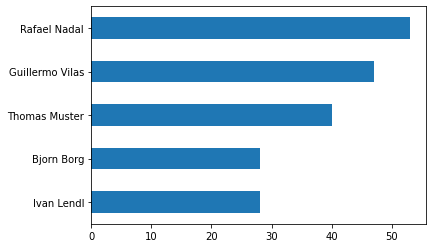

In [77]:
#Clay surface champions
df_clay = df.loc[df['tourney_surface'] == 'Clay']
ax = df_clay.singles_winner_name.value_counts().head().plot(kind='barh')
ax.invert_yaxis()

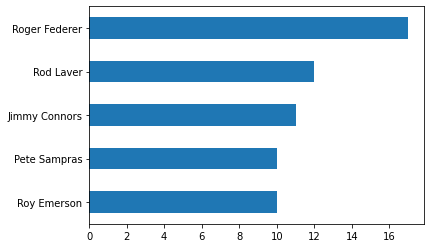

In [44]:
#Grass surface champions
df_grass = df.loc[df['tourney_surface'] == 'Grass']
ax = df_grass.singles_winner_name.value_counts().head().plot(kind='barh')
ax.invert_yaxis()

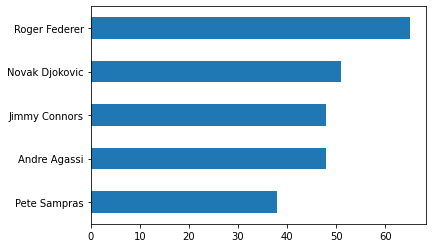

In [45]:
#Hard surface champions
df_hard = df.loc[df['tourney_surface'] == 'Hard']
ax = df_hard.singles_winner_name.value_counts().head().plot(kind='barh')
ax.invert_yaxis()

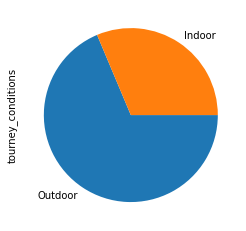

In [46]:
#Indoor vs outdoor
ax = df_hard.tourney_conditions.value_counts().head().plot(kind='pie')
ax.invert_yaxis()